In [12]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [13]:
from scipy.ndimage.filters import gaussian_filter1d
def plot_and_save(df, title, name, quantity):    
    smoothed_df = df[quantity].rolling(window=100).mean()
    df['smoothed_g'] = gaussian_filter1d(df[quantity], sigma=5)
    plt.plot(df['steps'], df['smoothed_g'])

    plt.plot(df['steps'], df[quantity], color='gray', alpha=0.3)
    plt.grid(True)
    plt.xlabel('steps')
    plt.ylabel(quantity)

    plt.title(title)
    plt.savefig(name+".png")
    plt.show()

C:\Users\M4\AppData\Local\Temp\ipykernel_41052\3172534633.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


Processing directory: C:\Users\M4\Downloads\Plotting\Plotting\Finetune_single_env from 4 outs to vascular obstacles
Rate files found: ['C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_env from 4 outs to vascular obstacles\\rate_target_reached.csv', 'C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_env from 4 outs to vascular obstacles\\rate_target_reached_env_0.csv', 'C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_env from 4 outs to vascular obstacles\\rate_target_reached_env_1.csv', 'C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_env from 4 outs to vascular obstacles\\rate_target_reached_env_2.csv', 'C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_env from 4 outs to vascular obstacles\\rate_target_reached_env_3.csv']
Reward files found: ['C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_env from 4 outs to vascular obstacles\\reward.csv', 'C:\\Users\\M4\\Downloads\\Plotting\\Plotting\\Finetune_single_en

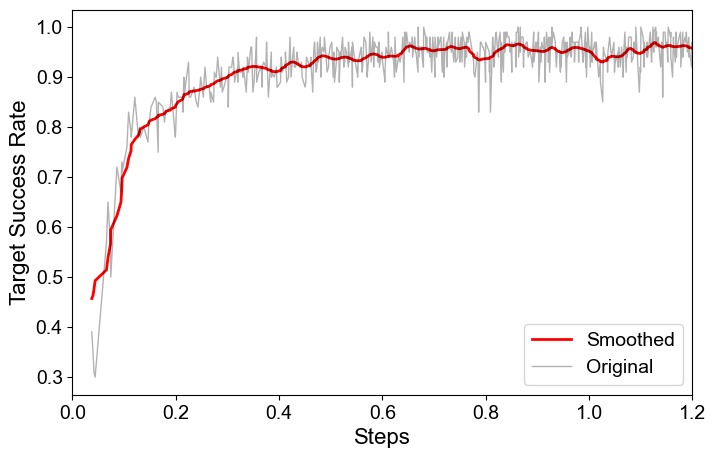

Reward DataFrame Head:
    steps     reward  lenght
0      0   0.000000       0
1      1  10.000000       1
2      2  10.000000       1
3      3  10.000000       1
4      5   9.969518       2
Filtered Reward Shape: (59269, 3)


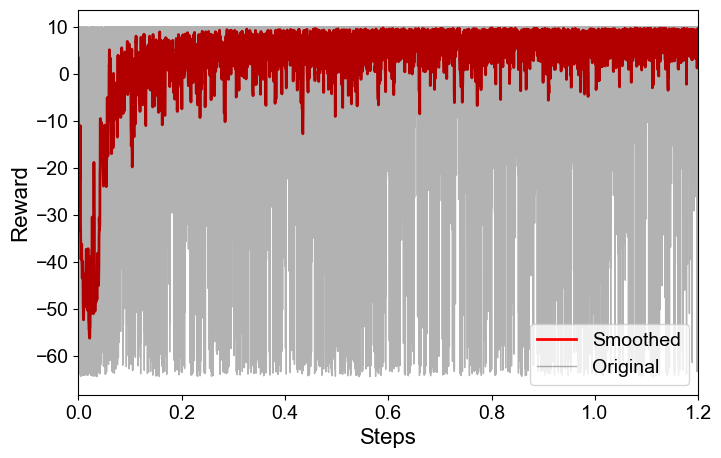

: 

In [ ]:
from glob import glob
import pandas as pd
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import os

# Configure global font and style
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

# Define the plot_and_save function
def plot_and_save(df, name, quantity, ylabel, legend_loc='upper left'):    
    # Apply smoothing
    smoothed_g = gaussian_filter1d(df[quantity], sigma=5)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df['steps'], smoothed_g, label='Smoothed', color='red', linewidth=2)
    plt.plot(df['steps'], df[quantity], color='black', alpha=0.3, label='Original', linewidth=1)
    plt.xlabel('Steps')
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)

    # Adjust x-axis to show values in millions with one decimal, start from 0, and end at 1.2M
    plt.xticks(ticks=plt.gca().get_xticks(), labels=[f"{x/1e6:.1f}" for x in plt.gca().get_xticks()])
    plt.xlim(left=0, right=1.2e6)

    # Show and save the plot
    plt.show()
    plt.savefig(name + ".png", dpi=300)
    plt.close()

# Use raw string for Windows path
base_path = r"C:\Users\M4\Downloads\Plotting\Plotting\Finetune_single_env from 4 outs to vascular obstacles"
print("Processing directory:", base_path)

# Check matching files globally
rate_files = glob(base_path + "/*rate_target_reached*.csv")
reward_files = glob(base_path + "/*reward*.csv")
print("Rate files found:", rate_files)
print("Reward files found:", reward_files)

# Process rate_target_reached files
if rate_files:
    rate_dataframes = [pd.read_csv(f) for f in rate_files if not pd.read_csv(f).empty]
    if rate_dataframes:
        rate_target_reached = pd.concat(rate_dataframes, ignore_index=True)
        print("Rate DataFrame Head:\n", rate_target_reached.head())

        rate_target_reached.sort_values("steps", inplace=True)
        rate_target_reached["steps"] *= 4
        rate_target_reached = rate_target_reached[rate_target_reached["steps"] < 1.2e6]
        print("Filtered Rate Shape:", rate_target_reached.shape)

        if not rate_target_reached.empty:
            plot_and_save(rate_target_reached, 
                          os.path.join(base_path, "target_success_rate"), 
                          "rate_target_reached", 
                          "Target Success Rate", 
                          legend_loc='lower right')

# Process reward files
if reward_files:
    reward_dataframes = [pd.read_csv(f) for f in reward_files if not pd.read_csv(f).empty]
    if reward_dataframes:
        reward = pd.concat(reward_dataframes, ignore_index=True)
        print("Reward DataFrame Head:\n", reward.head())

        reward.sort_values("steps", inplace=True)
        reward["steps"] *= 4
        reward = reward[reward["steps"] < 1.2e6]
        print("Filtered Reward Shape:", reward.shape)

        if not reward.empty:
            plot_and_save(reward, 
                          os.path.join(base_path, "reward"), 
                          "reward", 
                          "Reward", 
                          legend_loc='lower right')
